<h3 style=color:magenta> Pré processamento dos dados</h3>

In [1]:
import pandas as pd

# Importar e processar os dados
df = pd.read_excel('https://raw.githubusercontent.com/AlanaMiranda/backpropagation/main/dadosmamografia.xlsx', header=None)

Xt = df.values[:,:5] # separar dados de entrada

yt = df.values[:,-1] # separar dados de saida
yt = yt.reshape(-1,1)


In [2]:
from backpropagation.preprocessamento import normalizar

(x_treino, y_treino), (x_validacao, y_validacao), (x_teste, y_teste) = normalizar(Xt, yt)

# Fazer transposta nos dados de entrada e saida
x_treino = x_treino.T
x_validacao = x_validacao.T
x_teste = x_teste.T

y_treino = y_treino.T
y_validacao = y_validacao.T
y_teste = y_teste.T

<h3 style=color:magenta> Execução do algoritmo</h3>

In [11]:
# Execução
from backpropagation.rna import backpropagation

treinar = backpropagation(x_treino, y_treino, x_validacao, y_validacao, 15, 'sigmoide')


     Época      Erro_treino             Erro_validacao         
------------------------------------------------------------
     0/2000     0.17276916225070318     0.16683604913843902    
   200/2000     0.07974574375761738     0.06796630916682517    
   400/2000     0.07439429458586418     0.06096093449074039    
   600/2000     0.07045105722016123     0.056281455728557514   
   800/2000     0.0671516071460453      0.0530389295096984     
  1000/2000     0.06394453477078105     0.050458635383251384   
  1200/2000     0.061927785994899384    0.04923940262423257    
  1400/2000     0.06091081286629722     0.04895962304245385    
Treinamento finalizado por validação cruzada após 1415 épocas.


<h3 style=color:magenta> Matriz de confusão e outras métricas</h3>

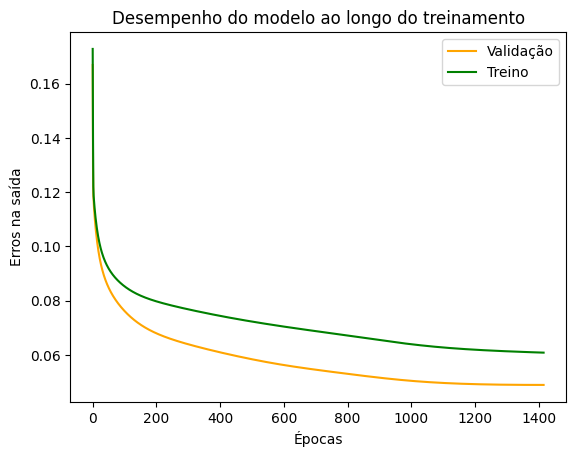

In [12]:
from backpropagation.avaliacoes import grafico

# Gráfico 
grafico(treinar)

In [13]:
from backpropagation.avaliacoes import previsao

# Fazer previsões
y_prev = previsao(treinar, x_teste)

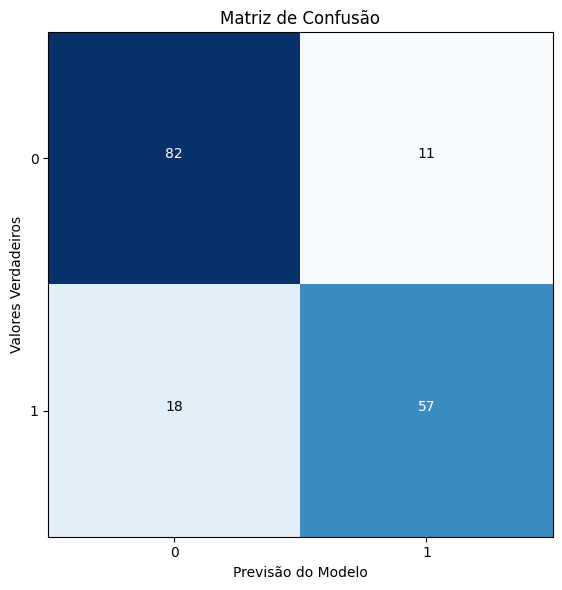

In [14]:
from backpropagation.avaliacoes import matriz_confusao

# Matriz de confusão
matriz_confusao(y_teste, y_prev)


In [15]:
from backpropagation.avaliacoes import acuracia

# Acurácia
acuracia(y_teste, y_prev)


0.8273809523809523